## Sentiment Analysis with BERT: A Comprehensive Guide

- Here I’ll walk you through a project where we built a machine learning model to analyze customer feedback from various sources and classify sentiment as positive, negative, or neutral.


### Table of Contents
- Problem Definition
- Create and Use a Virtual Environment
- Data Collection
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Modeling
    - Pre-processing
    - Splits the dataset
    - Load Model and Training Arguments
    - Evaluating the model
    - Saving the model
- Make Predictions on New Data
- Conclusion
    -  Next Steps for Optimization
- Connect and Collaborate

### 1) Problem Definition
 - The goal of this project is to analyze customer feedback from social media, surveys, and support tickets to determine the overall sentiment towards a company’s products and services. 
 - The sentiment analysis will classify feedback into three categories: positive, negative, and neutral.

### 2) Create and Use a Virtual Environment

In [1]:
# Create a New Virtual Environment: (pip)
# python -m venv myenv

# Activate the Virtual Environment:
#On Windows:
# .\myenv\Scripts\activate

#On macOS and Linux
# source myenv/bin/activate

# Install Torch
# pip install torch


### 3) Data Collection
- For this project, we’ll use the “Twitter US Airline Sentiment” dataset from Kaggle. 
- You can download the dataset from below link
- https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download

In [2]:
# Load the dataset in Jupyter notebook:
import pandas as pd

data = pd.read_csv('1000_tweets.csv') # Load the dataset

data.head() # Display the first few rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 4) Data Preprocessing
1) __Data Cleaning:__ Removing duplicates, correcting spelling errors, and filtering out irrelevant content.
2) __Normalization:__ Converting all text to lowercase, removing punctuation, and tokenization.
3) __Stopwords Removal:__ Eliminating common stopwords that do not contribute to sentiment analysis.
4) __Lemmatization:__ Reducing words to their base forms using spaCy.

- You need to install en_core_web_sm before loading it in your script..
- run the following command in your terminal or Jupyter notebook:

In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import spacy
from nltk.corpus import stopwords
import string

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    
    text = text.lower() # Convert to lowercase

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize and lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(preprocess_text)

### 5) Exploratory Data Analysis (EDA)
- EDA helps in understanding the data distribution, term frequencies, and identifying potential issues. We used matplotlib and seaborn for visualization.

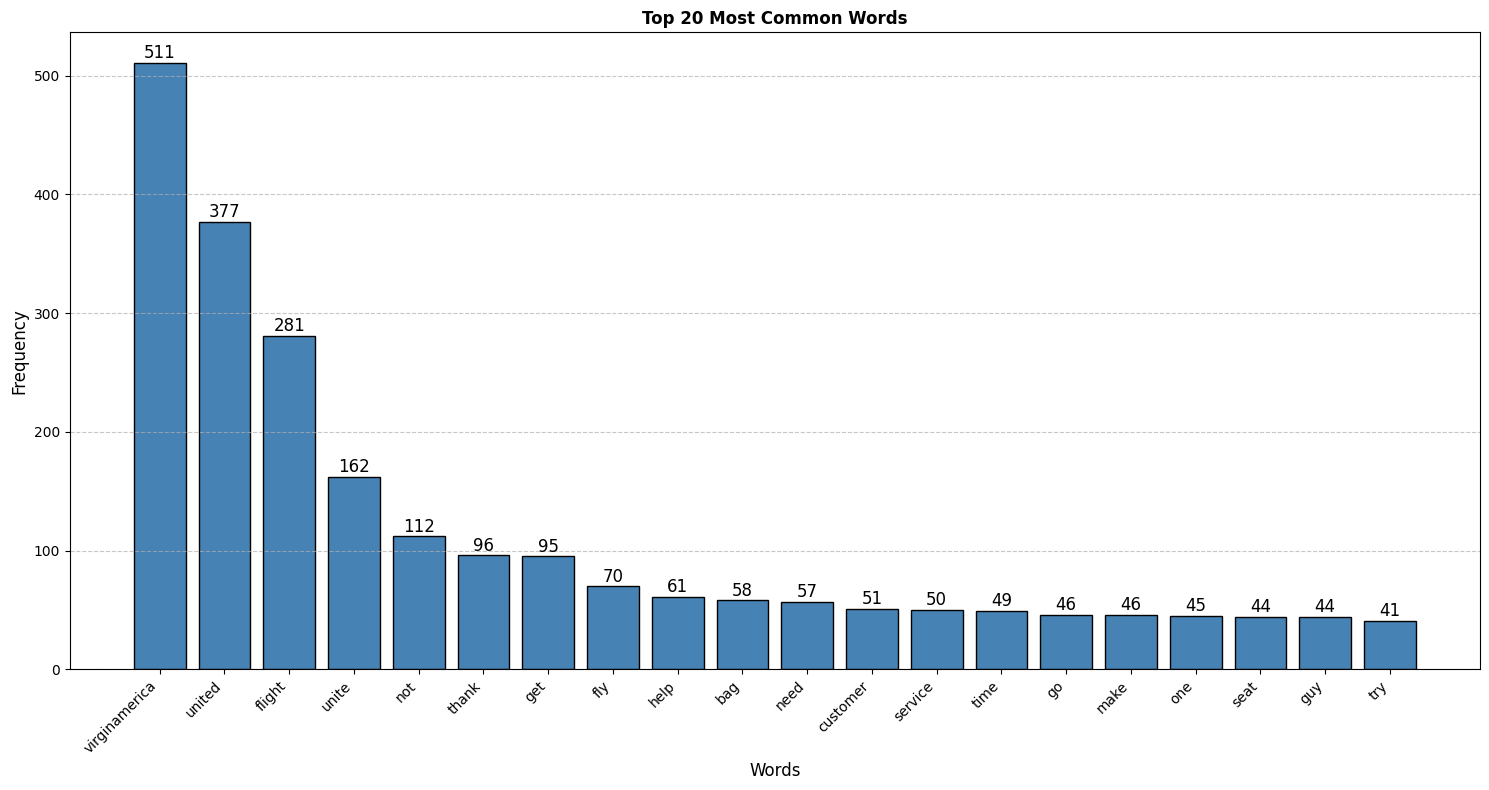

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of a word frequency plot
from collections import Counter

all_words = ' '.join(data['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(15, 8))
bars = plt.bar(words, counts, color='steelblue', edgecolor='black')

plt.title('Top 20 Most Common Words', fontsize=12, fontweight='bold')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 6) Modeling
- We considered several models for sentiment analysis, including traditional machine learning models and deep learning models. 
- We chose BERT from the Hugging Face Transformers library for its ability to understand context.

- You need to install Transformers Library. 
- You can do this by running the following command in your terminal or Jupyter notebook:
- !pip install transformers


#### 6.1) Pre-processing
- We split the data into training, validation, and test sets (70:15:15) and fine-tuned the BERT model.

In [6]:
# Map labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
data['label'] = data['airline_sentiment'].map(label_mapping)
data.head() # Display the first few rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text,label
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn say,1
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus add commercial experience t...,2
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica not today must mean need take an...,1
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,0
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,0


- Import the BertTokenizer class from the transformers library. 
- This class provides functionality to tokenize text data using a pre-trained BERT tokenizer bert-base-uncased.

In [7]:
from transformers import BertTokenizer

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_function(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=128)

data['tokenized'] = data['cleaned_text'].apply(tokenize_function)
data.head() # Display the first few rows

/home/aks/miniconda3/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text,label,tokenized
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn say,1,"[input_ids, token_type_ids, attention_mask]"
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus add commercial experience t...,2,"[input_ids, token_type_ids, attention_mask]"
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica not today must mean need take an...,1,"[input_ids, token_type_ids, attention_mask]"
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,0,"[input_ids, token_type_ids, attention_mask]"
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,0,"[input_ids, token_type_ids, attention_mask]"


- Using torch, this SentimentDataset class converts the data into a format appropriate use with the Hugging Face Transformers:
- this encodes the tokens with val, key.

In [8]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

### 6.2) Splits the dataset
Splits the dataset into three subsets:

- training (70% of the original data),
- validation (15% of the original data),
- test (15% of the original data).

validation is from validation set (temp_texts, temp_labels).

It ensures that the splits are reproducible by setting a random seed. 

The train_test_split function is used twice: first to separate the training set from the temporary set, and second to divide the temporary set into validation and test sets.

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_texts, temp_texts, train_labels, temp_labels = train_test_split(data['tokenized'].to_list(), data['label'].to_list(), test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

Next (Attention Mask)

- The convert_to_dicts function processes tokenized texts to create dictionaries containing lists of input_ids and attention_mask values. 
    - This format is necessary for further steps in model training and evaluation.

- After, create three dataset objects (train_dataset, val_dataset, and test_dataset) using the SentimentDataset class. 
- These objects hold the tokenized input texts (including input_ids and attention_mask) and the corresponding labels for training, validation, and testing purposes. 
- These datasets can then be used for model training, evaluation, and testing within the Hugging Face Trainer framework.

In [10]:
def convert_to_dicts(tokenized_texts):
    input_ids = [d['input_ids'] for d in tokenized_texts]
    attention_masks = [d['attention_mask'] for d in tokenized_texts]
    return {'input_ids': input_ids, 'attention_mask': attention_masks}

# Convert to lists of dictionaries
train_encodings = convert_to_dicts(train_texts)
val_encodings = convert_to_dicts(val_texts)
test_encodings = convert_to_dicts(test_texts)

# Create three dataset objects using the SentimentDataset
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

### 6.3) Load Model and Training Arguments
### fine tune from here using Trainer, TrainingArguments
Initializes a BERT model for sequence classification, setting it up with pre-trained weights from the bert-base-uncased model and configuring it to classify sequences into one of three categories:

from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

In [11]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


- Now let’s define training arguments using the TrainingArguments class from the Hugging Face Transformers library:

In [14]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results', # All files generated during training will be stored here
    num_train_epochs=3, # The model will be trained for 3 full epochs unless the step limit (max_steps) is reached first
    per_device_train_batch_size=5, # Training batch size per device (GPU or CPU).
    per_device_eval_batch_size=5, # Evaluation batch size per device (GPU or CPU).
    warmup_steps=10, # Number of warm-up steps during which the learning rate gradually increases to its initial value
    weight_decay=0.01, # Weight decay rate: this technique helps to avoid overfitting, penalizing large weights in the neural network
    logging_dir='./logs', # Directory where training logs will be stored
    max_steps=10,  # Maximum number of training steps to be performed
    save_steps=2,  # Range of steps after which the model will be saved
    logging_steps=2,  # Range of steps after which log information will be recorded
)

- Creates an instance of the Trainer class from the Hugging Face Transformers library, and start training (we defined max_steps=10).

In [15]:
trainer = Trainer(
    model=model, # The pre-trained model that you want to fine-tune or train
    args=training_args, # The training arguments that specify the configurations for the training process
    train_dataset=train_dataset, # The dataset used for training the model
    eval_dataset=val_dataset, # The dataset used for evaluating the model during training
    tokenizer = tokenizer
)

# Start training
trainer.train()

/tmp/ipykernel_414/4264443943.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
2,1.130900
4,1.144700
6,1.105900
8,1.089900
10,1.068200


TrainOutput(global_step=10, training_loss=1.107902193069458, metrics={'train_runtime': 55.6961, 'train_samples_per_second': 0.898, 'train_steps_per_second': 0.18, 'total_flos': 3288917721600.0, 'train_loss': 1.107902193069458, 'epoch': 0.07142857142857142})

### 6.4) Evaluating the model
- To evaluate the model using the Trainerclass, we can use the evaluate method on the test dataset.

In [16]:
# Evaluate the Model
results = trainer.evaluate(test_dataset)

print("Evaluation Results:")
print(f"  - Loss: {results['eval_loss']:.4f}")
print(f"  - Runtime: {results['eval_runtime']:.2f} seconds")
print(f"  - Samples per Second: {results['eval_samples_per_second']:.2f}")
print(f"  - Steps per Second: {results['eval_steps_per_second']:.2f}")
print(f"  - Epoch: {results['epoch']:.4f}")

Evaluation Results:
  - Loss: 1.0174
  - Runtime: 1.52 seconds
  - Samples per Second: 98.86
  - Steps per Second: 19.77
  - Epoch: 0.0714


#### Here is an explanation of each metric in the evaluation results:

1. Loss (eval_loss): this is the loss value calculated on the evaluation dataset. The loss measures how well (or poorly) the model’s predictions match the actual labels.

Interpretation: Lower loss values indicate better model performance. It shows how well the model is performing in terms of its prediction accuracy on the test data.

2. Runtime (eval_runtime): the total time taken to evaluate the model on the test dataset.

Interpretation: This metric is useful for understanding the efficiency and speed of the evaluation process. Lower values mean the model evaluates faster.

3. Samples per Second (eval_samples_per_second): the number of samples processed per second during the evaluation.

Interpretation: Higher values indicate a faster evaluation process. It measures the throughput of the evaluation in terms of data samples.

4. Steps per Second (eval_steps_per_second): the number of evaluation steps processed per second.

Interpretation: Higher values indicate a faster evaluation process. It measures the throughput of the evaluation in terms of steps (or batches).

5. Epoch (epoch): Indicates the epoch number corresponding to the current set of evaluation metrics.

Interpretation: This helps identify which epoch the evaluation metrics are associated with, especially useful when evaluating the model after different training epochs.

### 6.6) Saving the model
- After evaluating, we can save the model in the current directory using:

In [ ]:
# Save the model and tokenizer in the current folder
model_save_path = "./loca_twitter_bert_model_our"
trainer.save_model(model_save_path)
# tokenizer.save_pretrained(model_save_path)

In [18]:
# Load model
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

### 7) Make Predictions on New Data
- This function predict_sentiment is designed to predict the sentiment of a given text using the trained model:

In [19]:
import torch
def predict_sentiment(text):
    '''Function to predict the sentiment of a given text using a pre-trained BERT model.
    Args: the input text for sentiment prediction.
    Returns: the predicted sentiment ('negative', 'neutral', 'positive').    '''

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(predictions, dim=1).item()
    sentiment = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment[predicted_class]

In [20]:
# Example prediction
example_text = "I hate flying with this airline!"
example_text1 = "I love flying  with this airline"
predicted_sentiment = predict_sentiment(example_text1)
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: negative


## Testing with pipeline

In [21]:
# Load model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model_path = "./loca_twitter_bert_model_our"
model_path = "./twitter_bert_model"

model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [22]:
# sentiment analysis with the pipeline
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

data = ['i love you', 'i hate you']
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [23]:
# Example prediction

text = "i love it"
example_text1 = "I love flying with this airline"
example_text2 = "I hate flying with this airline!"

pipe = pipeline('text-classification', model=model, tokenizer=tokenizer)

results = pipe(text)
# results = pipe(example_text1)
# results = pipe(example_text2)

for result in results:
    print(result)

Device set to use cuda:0


{'label': 'LABEL_0', 'score': 0.40624314546585083}


### 8) Conclusion
This project demonstrated the complete machine learning lifecycle for sentiment analysis, from data collection and preprocessing to model training and evaluation.

By leveraging the power of BERT and the Transformers library, we built a robust model capable of accurately classifying customer feedback sentiment into positive, negative, or neutral categories.

The project showcased several key aspects of a successful machine learning implementation:

- Data Preprocessing: The importance of cleaning, normalizing, and tokenizing text data to ensure high-quality input for the model.
- Model Selection: Choosing an advanced pre-trained model like BERT to handle the complexities of natural language understanding.
- Training and Evaluation: The iterative process of training, validating, and testing the model to achieve optimal performance.

#### Next Steps for Optimization:

While the current model performs well, there are several avenues for further optimization and enhancement:

1. Hyperparameter Tuning
    - Experiment with different learning rates, batch sizes, and the number of epochs to find the optimal training configuration.
Use techniques like grid search or Bayesian optimization to systematically explore the hyperparameter space.

2. Data Augmentation
    - Enhance the training dataset with augmented data to improve the model’s robustness and generalization capabilities.
Techniques like synonym replacement, random insertion, and back-translation can be employed.

3. Model Fine-Tuning
    - Fine-tune the BERT model on more domain-specific data or additional related datasets to improve its performance on the specific task of customer feedback sentiment analysis.
    - Consider training on larger datasets or using more specialized variants of BERT, such as RoBERTa or DistilBERT, for potential performance gains.
By pursuing these optimization strategies, the model can be further refined to achieve even higher levels of accuracy and robustness, ultimately leading to better insights and decision-making based on customer feedback.
